In [1]:
#Importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, MaxPool1D, Convolution1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import (BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

import efficientnet.keras 
from tensorflow.keras.applications.efficientnet import EfficientNetB0

from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
#Loading the paths for the datasets
covid = os.listdir("E:\\train\\COVID19")
normal = os.listdir("E:\\train\\NORMAL")
pneumonia = os.listdir("E:\\train\\PNEUMONIA")
tuber = os.listdir("E:\\train\\TURBERCULOSIS")


In [3]:
#Defining a funtion names "sampleimage" to view all types of images
def sampleimage(image_path):
    img = load_img(image_path)
    print((img_to_array(img)).shape)
    plt.imshow(img)
    plt.show()

(885, 1036, 3)


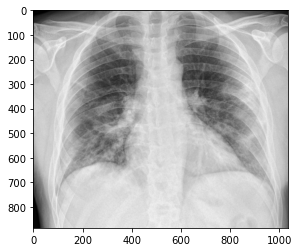

In [4]:
labels = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#COVID 19 image 
image_path="E:\\train\\COVID19\\COVID19(110).jpg"
print(labels[0])
sampleimage(image_path)
#Normal image 
print(labels[1])
image_path = "E:\\train\\NORMAL\\IM-0115-0001.jpeg"
sampleimage(image_path)
#Pneumonia image
print(labels[2])
image_path="E:\\train\\PNEUMONIA\\person1_bacteria_1.jpeg"
sampleimage(image_path)
#Turberculosis image
print(labels[3])
image_path = "E:\\train\\TURBERCULOSIS\\Tuberculosis-1.png"
sampleimage(image_path)

In [8]:
#Since all the given images are x-rays, the pixcel size of and every image are different, 
# so all the images are converted into 224*224 pixcels

labels = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

x_train=[]
y_train=[]

for i in labels:
    folder_path = os.path.join("E:", "train", i)
    print(folder_path)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        x_train.append(img)
        y_train.append(i)
        
x_train = np.array(x_train)
y_train = np.array(y_train)

E:train\COVID19
E:train\NORMAL
E:train\PNEUMONIA
E:train\TURBERCULOSIS


In [9]:
#Converting test images into 224*224 pixcels
x_test=[]
y_test=[]

for i in labels:
    folder_path = os.path.join("E:", "test", i)
    print(folder_path)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        x_test.append(img)
        y_test.append(i)
        
x_test = np.array(x_test)
y_test = np.array(y_test)

E:test\COVID19
E:test\NORMAL
E:test\PNEUMONIA
E:test\TURBERCULOSIS


In [10]:
#indexing the images 

ytrain = []
for i in y_train:
    ytrain.append(labels.index(i))
ytrain = tf.keras.utils.to_categorical(ytrain)

ytest = []
for i in y_test:
    ytest.append(labels.index(i))
ytest = tf.keras.utils.to_categorical(ytest)

In [12]:
print("Shape of training dataset:")
print("Input: ", x_train.shape)
print("Output: ", ytrain.shape)

print("\nShape of testing dataset: ")
print("Input: ", x_test.shape)
print("Output: ", ytest.shape)

Shape of training dataset:
Input:  (6326, 224, 224, 3)
Output:  (6326, 4)

Shape of testing dataset: 
Input:  (771, 224, 224, 3)
Output:  (771, 4)


In [13]:
#Converting the 4D to 2D
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [14]:
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [15]:
print("Shape of training dataset:")
print("Input: ", x_train2.shape)
print("Output: ", ytrain.shape)

print("\nShape of testing dataset: ")
print("Input: ", x_test2.shape)
print("Output: ", ytest.shape)

Shape of training dataset:
Input:  (6326, 150528)
Output:  (6326, 4)

Shape of testing dataset: 
Input:  (771, 150528)
Output:  (771, 4)


In [18]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

RFC.fit(x_train2,ytrain)

RandomForestClassifier()

In [19]:
y_pred=RFC.predict(x_test2)
y_pred

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]], dtype=float32)

In [20]:
acc = accuracy_score(y_pred,ytest)
print("Accuracy of the model: ", acc)

Accuracy of the model:  0.7055771725032426


In [21]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.63      0.97      0.77        69
           1       0.26      0.98      0.41        62
           2       0.99      0.76      0.86       509
           3       0.76      0.79      0.77        39

   micro avg       0.71      0.80      0.75       679
   macro avg       0.66      0.88      0.70       679
weighted avg       0.87      0.80      0.80       679
 samples avg       0.71      0.71      0.71       679



C:\Users\mr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# To need to try for: 
# 1. without the callback function
# 2. number of epochs to 21
# 